In [2]:
import numpy as np
import cv2 as cv2
import argparse
import matplotlib.pyplot as plt
from numpy import mgrid,vstack


## Q1

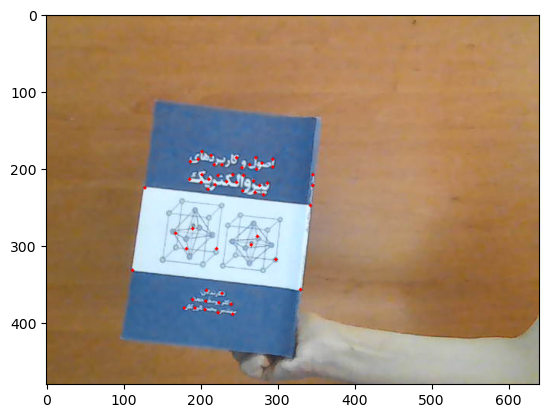

In [45]:
#capture frame from camera
obj = cv2.VideoCapture(0)
success, frame = obj.read()
obj_pic=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#extreact keypoint base image
p0=cv2.goodFeaturesToTrack(obj_pic,55,0.02,10,False)
#draw point on image
img=cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
for i in p0:
    x,y = i.ravel()
    cv2.circle(img,(int(x),int(y)),2,(255,0,0),-1)
    
# Display the image
plt.imshow(img)
plt.show()

In [47]:
obj.release()

## Q2

In [21]:
cap = cv2.VideoCapture(0)

# params for corner detection
feature_params = dict(maxCorners=100,
                      qualityLevel=0.3,
                      minDistance=7,
                      blockSize=7)

# Parameters for lucas kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                           10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))

frames_3=np.zeros((3,480,640))

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

frames_3[0] = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[1] = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[2] = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
#creating an object of videoWriter for writing video
out = cv2.VideoWriter('q2.avi',fourcc, 15, (int(cap.get(3)),int(cap.get(4))))

while (1):

    ret, frame = cap.read()
    if ret:
        # frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(gray.shape)
        frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
        # print(frames_3.shape)

        frames_3 = np.delete(frames_3, 0, axis=0)
        print(frames_3)
        print(frames_3.shape)

        image1 = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        image2 = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        image3 = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        old_gray = image1

        p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,image2,p0, None,**lk_params)

        # Select good points
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # draw the tracks
        mask = np.zeros_like(frame)
        for i, (new, old) in enumerate(zip(good_new,good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)),color=(0,255,255), thickness=2)

            frame = cv2.circle(frame, (int(a), int(b)), 5,color=(0,255,255), thickness=-1)

        img = cv2.add(frame, mask)

        # Updating Previous frame and points
        old_gray = image2.copy()
        p0 = good_new.reshape(-1, 1, 2)


        old_gray_2 = image2

        p0_2 = cv2.goodFeaturesToTrack(old_gray_2, mask=None, **feature_params)

        p1_2, st_2, err = cv2.calcOpticalFlowPyrLK(old_gray_2,image3,p0_2, None,**lk_params)

        # Select good points
        good_new_2 = p1_2[st_2 == 1]
        good_old_2 = p0_2[st_2 == 1]

        # draw the tracks
        mask_2 = np.zeros_like(frame)
        for i, (new, old) in enumerate(zip(good_new_2,good_old_2)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask_2, (int(a), int(b)), (int(c), int(d)),color=(0,0,255), thickness=2)

            frame = cv2.circle(frame, (int(a), int(b)), 5,color=(0,0,255), thickness=-1)

        img = cv2.add(frame, mask)

        out.write(img)
        cv2.imshow('frame', img)

        if cv2.waitKey(20) & 0xFF == ord('q'):
            break


        # Updating Previous frame and points
        old_gray_2 = image3.copy()
        p0_2 = good_new_2.reshape(-1, 1, 2)
cv2.destroyAllWindows()
cap.release()
out.release()

[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[132. 132. 131. ... 159. 160. 160.]
  [132. 131. 131. ... 158. 158. 158.]
  [131. 131. 131. ... 156. 156. 157.]
  ...
  [ 99.  99.  99. ...  51.  50.  54.]
  [ 99.  99.  99. ...  49.  50.  57.]
  [ 99.  99.  99. ...  47.  50.  60.]]]
(3, 480, 640)
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[132. 132. 131. ... 159. 160. 160.]
  [1

(480, 640)
[[[131. 130. 130. ... 162. 163. 163.]
  [131. 131. 130. ... 161. 161. 161.]
  [132. 131. 131. ... 160. 160. 161.]
  ...
  [101. 101. 101. ...  80.  49.  36.]
  [101. 101. 101. ... 146.  94.  43.]
  [101. 101. 100. ... 164. 120.  62.]]

 [[130. 130. 131. ... 161. 161. 162.]
  [130. 130. 131. ... 160. 161. 162.]
  [131. 131. 132. ... 160. 161. 162.]
  ...
  [102. 101. 101. ... 157.  84.  59.]
  [101. 101. 100. ... 163. 130.  77.]
  [100. 100. 100. ... 170. 174.  94.]]

 [[130. 130. 130. ... 161. 161. 159.]
  [130. 130. 130. ... 162. 162. 160.]
  [130. 130. 130. ... 160. 161. 160.]
  ...
  [100. 100. 100. ... 183. 137.  81.]
  [100. 100. 100. ... 181. 128.  64.]
  [100. 100.  99. ... 182. 137.  81.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 131. ... 161. 161. 162.]
  [130. 130. 131. ... 160. 161. 162.]
  [131. 131. 132. ... 160. 161. 162.]
  ...
  [102. 101. 101. ... 157.  84.  59.]
  [101. 101. 100. ... 163. 130.  77.]
  [100. 100. 100. ... 170. 174.  94.]]

 [[130. 130. 130. ..

(480, 640)
[[[134. 134. 134. ... 161. 162. 163.]
  [133. 133. 133. ... 162. 162. 162.]
  [133. 133. 133. ... 161. 161. 160.]
  ...
  [100. 101. 101. ...  84.  59.  48.]
  [100. 100. 101. ...  76.  75.  73.]
  [100. 100. 101. ... 100. 103.  87.]]

 [[131. 131. 132. ... 162. 162. 161.]
  [131. 131. 132. ... 161. 160. 159.]
  [131. 131. 131. ... 160. 160. 160.]
  ...
  [100. 100. 100. ... 139. 140. 140.]
  [100. 100. 100. ... 133. 134. 134.]
  [100. 100. 100. ... 131. 133. 133.]]

 [[130. 131. 131. ... 162. 161. 160.]
  [130. 131. 131. ... 161. 161. 160.]
  [131. 131. 131. ... 161. 161. 161.]
  ...
  [101. 101. 101. ... 133. 136. 131.]
  [101. 101. 100. ... 127. 116. 109.]
  [101. 100. 100. ... 123. 112. 116.]]]
(3, 480, 640)
(480, 640)
[[[131. 131. 132. ... 162. 162. 161.]
  [131. 131. 132. ... 161. 160. 159.]
  [131. 131. 131. ... 160. 160. 160.]
  ...
  [100. 100. 100. ... 139. 140. 140.]
  [100. 100. 100. ... 133. 134. 134.]
  [100. 100. 100. ... 131. 133. 133.]]

 [[130. 131. 131. ..

(480, 640)
[[[129. 129. 129. ... 163. 162. 161.]
  [129. 129. 129. ... 161. 160. 159.]
  [129. 129. 129. ... 160. 160. 159.]
  ...
  [103. 102. 102. ...  97.  97.  98.]
  [102. 102. 101. ...  97.  97.  97.]
  [102. 101. 101. ...  97.  97.  96.]]

 [[130. 130. 130. ... 165. 165. 165.]
  [130. 130. 130. ... 164. 164. 164.]
  [130. 130. 130. ... 163. 164. 164.]
  ...
  [103. 103. 103. ...  95.  96.  97.]
  [103. 103. 103. ...  95.  95.  95.]
  [103. 103. 103. ...  96.  95.  94.]]

 [[130. 130. 131. ... 164. 164. 164.]
  [130. 130. 130. ... 163. 163. 163.]
  [130. 130. 130. ... 162. 162. 162.]
  ...
  [101. 101. 101. ...  96.  96.  97.]
  [102. 102. 102. ...  96.  96.  96.]
  [102. 102. 102. ...  95.  95.  95.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 165. 165. 165.]
  [130. 130. 130. ... 164. 164. 164.]
  [130. 130. 130. ... 163. 164. 164.]
  ...
  [103. 103. 103. ...  95.  96.  97.]
  [103. 103. 103. ...  95.  95.  95.]
  [103. 103. 103. ...  96.  95.  94.]]

 [[130. 130. 131. ..

(480, 640)
[[[131. 131. 131. ... 162. 162. 161.]
  [131. 131. 131. ... 163. 163. 163.]
  [131. 131. 131. ... 162. 163. 162.]
  ...
  [101. 102. 102. ...  96.  96.  95.]
  [100. 101. 102. ...  96.  95.  95.]
  [ 99. 100. 101. ...  96.  95.  95.]]

 [[134. 134. 134. ... 162. 161. 161.]
  [134. 134. 133. ... 162. 161. 160.]
  [133. 133. 133. ... 161. 160. 159.]
  ...
  [103. 103. 103. ...  97.  96.  95.]
  [103. 103. 103. ...  96.  95.  95.]
  [103. 103. 103. ...  96.  95.  95.]]

 [[134. 133. 133. ... 164. 163. 162.]
  [134. 134. 133. ... 162. 161. 161.]
  [135. 134. 134. ... 162. 162. 161.]
  ...
  [103. 103. 103. ...  97.  96.  95.]
  [103. 103. 103. ...  96.  95.  95.]
  [103. 103. 103. ...  96.  95.  95.]]]
(3, 480, 640)
(480, 640)
[[[134. 134. 134. ... 162. 161. 161.]
  [134. 134. 133. ... 162. 161. 160.]
  [133. 133. 133. ... 161. 160. 159.]
  ...
  [103. 103. 103. ...  97.  96.  95.]
  [103. 103. 103. ...  96.  95.  95.]
  [103. 103. 103. ...  96.  95.  95.]]

 [[134. 133. 133. ..

(480, 640)
[[[131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 162. 162. 161.]
  [132. 132. 131. ... 160. 161. 161.]
  ...
  [101. 101. 100. ... 100. 100.  99.]
  [101. 101. 100. ...  98.  96.  96.]
  [101. 101. 101. ...  95.  94.  93.]]

 [[129. 129. 129. ... 162. 162. 161.]
  [130. 130. 130. ... 161. 160. 160.]
  [131. 131. 131. ... 159. 160. 160.]
  ...
  [101. 101. 100. ...  98.  98.  98.]
  [101. 101. 100. ...  97.  97.  97.]
  [102. 101. 101. ...  96.  96.  96.]]

 [[131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 162. 162. 162.]
  ...
  [100. 100. 100. ...  98.  98.  98.]
  [100. 100. 100. ...  97.  97.  97.]
  [100. 100. 100. ...  95.  94.  94.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 129. ... 162. 162. 161.]
  [130. 130. 130. ... 161. 160. 160.]
  [131. 131. 131. ... 159. 160. 160.]
  ...
  [101. 101. 100. ...  98.  98.  98.]
  [101. 101. 100. ...  97.  97.  97.]
  [102. 101. 101. ...  96.  96.  96.]]

 [[131. 131. 131. ..

(480, 640)
[[[131. 131. 131. ... 162. 162. 161.]
  [131. 131. 131. ... 162. 162. 161.]
  [131. 131. 131. ... 161. 161. 161.]
  ...
  [101. 101. 101. ...  94.  93.  92.]
  [101. 101. 101. ...  94.  93.  93.]
  [101. 101. 101. ...  94.  94.  93.]]

 [[132. 132. 132. ... 162. 163. 163.]
  [131. 131. 131. ... 160. 161. 162.]
  [130. 130. 131. ... 161. 162. 162.]
  ...
  [102. 102. 102. ...  95.  94.  94.]
  [102. 102. 102. ...  94.  94.  94.]
  [102. 102. 102. ...  94.  94.  94.]]

 [[132. 132. 132. ... 163. 163. 163.]
  [132. 131. 131. ... 163. 162. 162.]
  [132. 131. 131. ... 162. 161. 160.]
  ...
  [102. 102. 102. ...  93.  93.  93.]
  [102. 102. 101. ...  92.  91.  92.]
  [102. 102. 101. ...  91.  91.  91.]]]
(3, 480, 640)
(480, 640)
[[[132. 132. 132. ... 162. 163. 163.]
  [131. 131. 131. ... 160. 161. 162.]
  [130. 130. 131. ... 161. 162. 162.]
  ...
  [102. 102. 102. ...  95.  94.  94.]
  [102. 102. 102. ...  94.  94.  94.]
  [102. 102. 102. ...  94.  94.  94.]]

 [[132. 132. 132. ..

(480, 640)
[[[131. 131. 130. ... 161. 161. 161.]
  [131. 130. 130. ... 163. 164. 164.]
  [130. 130. 129. ... 162. 162. 161.]
  ...
  [102. 101. 101. ... 173. 173. 172.]
  [101. 101. 101. ... 173. 173. 173.]
  [101. 101. 100. ... 173. 174. 174.]]

 [[130. 130. 130. ... 162. 163. 164.]
  [130. 130. 130. ... 163. 162. 161.]
  [130. 130. 130. ... 163. 161. 160.]
  ...
  [101. 101. 101. ... 174. 175. 176.]
  [101. 101. 100. ... 175. 176. 177.]
  [100. 100. 100. ... 175. 176. 176.]]

 [[129. 129. 129. ... 163. 163. 162.]
  [129. 129. 130. ... 164. 165. 165.]
  [130. 130. 130. ... 162. 162. 162.]
  ...
  [101. 101. 101. ... 178. 177. 177.]
  [101. 101. 101. ... 178. 177. 177.]
  [101. 101. 101. ... 178. 178. 179.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 162. 163. 164.]
  [130. 130. 130. ... 163. 162. 161.]
  [130. 130. 130. ... 163. 161. 160.]
  ...
  [101. 101. 101. ... 174. 175. 176.]
  [101. 101. 100. ... 175. 176. 177.]
  [100. 100. 100. ... 175. 176. 176.]]

 [[129. 129. 129. ..

(480, 640)
[[[129. 129. 130. ... 162. 162. 161.]
  [130. 130. 130. ... 163. 163. 162.]
  [130. 130. 130. ... 163. 163. 162.]
  ...
  [102. 102. 101. ... 116. 116. 116.]
  [102. 102. 101. ... 115. 115. 115.]
  [102. 102. 102. ... 115. 114. 114.]]

 [[131. 131. 131. ... 163. 161. 160.]
  [131. 131. 131. ... 163. 162. 161.]
  [131. 131. 131. ... 161. 161. 161.]
  ...
  [102. 102. 101. ... 110. 109. 109.]
  [103. 102. 101. ... 109. 108. 107.]
  [104. 103. 101. ... 110. 109. 109.]]

 [[131. 130. 130. ... 162. 161. 160.]
  [131. 131. 130. ... 162. 161. 160.]
  [131. 131. 131. ... 161. 161. 160.]
  ...
  [102. 102. 102. ...  95.  94.  94.]
  [100. 101. 101. ...  94.  94.  94.]
  [100. 100. 101. ...  94.  94.  94.]]]
(3, 480, 640)
(480, 640)
[[[131. 131. 131. ... 163. 161. 160.]
  [131. 131. 131. ... 163. 162. 161.]
  [131. 131. 131. ... 161. 161. 161.]
  ...
  [102. 102. 101. ... 110. 109. 109.]
  [103. 102. 101. ... 109. 108. 107.]
  [104. 103. 101. ... 110. 109. 109.]]

 [[131. 130. 130. ..

(480, 640)
[[[128. 129. 130. ... 163. 162. 162.]
  [129. 129. 130. ... 161. 161. 160.]
  [129. 129. 130. ... 161. 161. 160.]
  ...
  [102. 101. 101. ... 133. 133. 133.]
  [100. 100. 100. ... 131. 132. 133.]
  [ 99.  99.  99. ... 130. 131. 132.]]

 [[130. 130. 130. ... 162. 163. 163.]
  [130. 130. 130. ... 161. 161. 161.]
  [130. 130. 130. ... 160. 160. 160.]
  ...
  [101. 101. 100. ... 130. 131. 132.]
  [100.  99.  99. ... 129. 130. 130.]
  [ 99.  99.  98. ... 129. 129. 129.]]

 [[130. 129. 129. ... 162. 162. 161.]
  [130. 129. 129. ... 162. 161. 161.]
  [131. 130. 129. ... 160. 160. 160.]
  ...
  [102. 102. 102. ... 101. 101. 101.]
  [102. 102. 101. ... 102. 102. 102.]
  [102. 101. 101. ... 102. 102. 102.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 162. 163. 163.]
  [130. 130. 130. ... 161. 161. 161.]
  [130. 130. 130. ... 160. 160. 160.]
  ...
  [101. 101. 100. ... 130. 131. 132.]
  [100.  99.  99. ... 129. 130. 130.]
  [ 99.  99.  98. ... 129. 129. 129.]]

 [[130. 129. 129. ..

(480, 640)
[[[132. 133. 133. ... 160. 160. 159.]
  [132. 132. 133. ... 163. 163. 163.]
  [131. 131. 132. ... 160. 161. 161.]
  ...
  [100. 100. 100. ... 162. 162. 162.]
  [100. 100. 100. ... 161. 161. 161.]
  [100. 100. 100. ... 161. 161. 161.]]

 [[133. 133. 133. ... 159. 160. 161.]
  [133. 133. 133. ... 163. 163. 163.]
  [132. 132. 132. ... 162. 161. 159.]
  ...
  [101. 101. 101. ...  97.  97.  97.]
  [100. 100. 100. ...  97.  96.  96.]
  [100. 100. 100. ...  97.  96.  95.]]

 [[133. 133. 133. ... 159. 160. 161.]
  [133. 133. 133. ... 163. 163. 163.]
  [132. 132. 132. ... 162. 161. 159.]
  ...
  [101. 101. 101. ...  97.  97.  97.]
  [100. 100. 100. ...  97.  96.  96.]
  [100. 100. 100. ...  97.  96.  95.]]]
(3, 480, 640)
(480, 640)
[[[133. 133. 133. ... 159. 160. 161.]
  [133. 133. 133. ... 163. 163. 163.]
  [132. 132. 132. ... 162. 161. 159.]
  ...
  [101. 101. 101. ...  97.  97.  97.]
  [100. 100. 100. ...  97.  96.  96.]
  [100. 100. 100. ...  97.  96.  95.]]

 [[133. 133. 133. ..

(480, 640)
[[[131. 131. 131. ... 162. 163. 163.]
  [132. 132. 132. ... 161. 162. 162.]
  [131. 131. 131. ... 160. 161. 162.]
  ...
  [100. 100. 100. ... 112. 111. 111.]
  [100. 100. 100. ... 110. 110. 109.]
  [100. 100. 100. ... 110. 110. 110.]]

 [[130. 130. 131. ... 164. 164. 163.]
  [130. 131. 131. ... 163. 163. 163.]
  [131. 131. 131. ... 162. 162. 162.]
  ...
  [101. 101. 101. ...  85.  98. 113.]
  [101. 101. 101. ...  84.  89.  96.]
  [101. 101. 101. ...  84.  92.  93.]]

 [[132. 131. 131. ... 163. 163. 162.]
  [132. 131. 131. ... 162. 162. 161.]
  [132. 131. 131. ... 161. 161. 160.]
  ...
  [100. 100. 101. ...  90.  91.  98.]
  [100. 100. 101. ...  89.  87.  92.]
  [100. 100. 101. ...  89.  93.  89.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 131. ... 164. 164. 163.]
  [130. 131. 131. ... 163. 163. 163.]
  [131. 131. 131. ... 162. 162. 162.]
  ...
  [101. 101. 101. ...  85.  98. 113.]
  [101. 101. 101. ...  84.  89.  96.]
  [101. 101. 101. ...  84.  92.  93.]]

 [[132. 131. 131. ..

(480, 640)
[[[130. 130. 130. ... 161. 160. 159.]
  [130. 130. 130. ... 161. 160. 159.]
  [130. 130. 130. ... 160. 160. 160.]
  ...
  [103. 103. 102. ...  97.  97.  96.]
  [103. 103. 103. ...  97.  96.  96.]
  [104. 104. 103. ...  97.  96.  96.]]

 [[130. 130. 130. ... 160. 160. 160.]
  [130. 130. 130. ... 163. 163. 163.]
  [130. 130. 130. ... 160. 160. 159.]
  ...
  [101. 101. 102. ...  97.  97.  97.]
  [101. 101. 101. ...  96.  96.  96.]
  [102. 102. 101. ...  96.  96.  96.]]

 [[130. 130. 130. ... 161. 161. 160.]
  [130. 130. 130. ... 162. 163. 162.]
  [130. 130. 130. ... 161. 161. 159.]
  ...
  [102. 102. 102. ...  97.  97.  96.]
  [102. 102. 102. ...  97.  96.  96.]
  [102. 102. 103. ...  97.  96.  96.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 160. 160. 160.]
  [130. 130. 130. ... 163. 163. 163.]
  [130. 130. 130. ... 160. 160. 159.]
  ...
  [101. 101. 102. ...  97.  97.  97.]
  [101. 101. 101. ...  96.  96.  96.]
  [102. 102. 101. ...  96.  96.  96.]]

 [[130. 130. 130. ..

(480, 640)
[[[132. 132. 131. ... 165. 165. 164.]
  [132. 131. 131. ... 164. 164. 164.]
  [131. 131. 131. ... 161. 162. 162.]
  ...
  [104. 103. 103. ... 135. 135. 136.]
  [104. 103. 103. ... 135. 135. 136.]
  [104. 103. 103. ... 136. 136. 136.]]

 [[130. 130. 130. ... 163. 163. 164.]
  [131. 131. 131. ... 162. 162. 163.]
  [132. 132. 131. ... 161. 162. 163.]
  ...
  [103. 103. 103. ... 138. 138. 138.]
  [103. 103. 103. ... 138. 138. 138.]
  [103. 103. 103. ... 138. 138. 138.]]

 [[131. 131. 132. ... 165. 164. 163.]
  [131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 162. 163. 163.]
  ...
  [103. 103. 103. ... 139. 139. 139.]
  [103. 103. 103. ... 138. 138. 138.]
  [103. 103. 103. ... 138. 138. 138.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 163. 163. 164.]
  [131. 131. 131. ... 162. 162. 163.]
  [132. 132. 131. ... 161. 162. 163.]
  ...
  [103. 103. 103. ... 138. 138. 138.]
  [103. 103. 103. ... 138. 138. 138.]
  [103. 103. 103. ... 138. 138. 138.]]

 [[131. 131. 132. ..

(480, 640)
[[[129. 130. 131. ... 160. 162. 163.]
  [129. 129. 130. ... 163. 163. 164.]
  [129. 130. 130. ... 162. 161. 160.]
  ...
  [101. 101. 101. ... 132. 131. 131.]
  [101. 101. 101. ... 131. 130. 130.]
  [101. 101. 101. ... 130. 130. 130.]]

 [[129. 129. 129. ... 161. 159. 161.]
  [129. 129. 129. ... 163. 161. 163.]
  [129. 129. 129. ... 162. 159. 161.]
  ...
  [102. 102. 102. ... 131. 130. 131.]
  [101. 101. 101. ... 131. 131. 131.]
  [100. 100. 100. ... 131. 131. 132.]]

 [[130. 130. 130. ... 160. 159. 162.]
  [129. 129. 130. ... 162. 161. 162.]
  [129. 130. 130. ... 161. 158. 160.]
  ...
  [101. 101. 100. ... 130. 131. 131.]
  [100. 100. 100. ... 130. 131. 132.]
  [ 99.  99.  99. ... 130. 131. 132.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 129. ... 161. 159. 161.]
  [129. 129. 129. ... 163. 161. 163.]
  [129. 129. 129. ... 162. 159. 161.]
  ...
  [102. 102. 102. ... 131. 130. 131.]
  [101. 101. 101. ... 131. 131. 131.]
  [100. 100. 100. ... 131. 131. 132.]]

 [[130. 130. 130. ..

(480, 640)
[[[132. 132. 131. ... 160. 159. 158.]
  [132. 132. 132. ... 161. 161. 161.]
  [132. 132. 132. ... 160. 160. 160.]
  ...
  [102. 102. 103. ...  98.  97.  96.]
  [102. 102. 102. ...  98.  97.  96.]
  [102. 102. 102. ...  99.  97.  96.]]

 [[131. 131. 131. ... 159. 159. 160.]
  [131. 131. 131. ... 161. 161. 163.]
  [132. 132. 131. ... 159. 160. 162.]
  ...
  [102. 102. 102. ...  99.  98.  97.]
  [102. 101. 101. ...  98.  97.  96.]
  [101. 101. 101. ...  98.  97.  96.]]

 [[133. 133. 133. ... 161. 161. 160.]
  [132. 132. 132. ... 162. 163. 163.]
  [132. 132. 132. ... 160. 160. 161.]
  ...
  [104. 105. 105. ...  99.  97.  96.]
  [104. 105. 105. ...  99.  97.  95.]
  [104. 105. 105. ...  99.  96.  95.]]]
(3, 480, 640)
(480, 640)
[[[131. 131. 131. ... 159. 159. 160.]
  [131. 131. 131. ... 161. 161. 163.]
  [132. 132. 131. ... 159. 160. 162.]
  ...
  [102. 102. 102. ...  99.  98.  97.]
  [102. 101. 101. ...  98.  97.  96.]
  [101. 101. 101. ...  98.  97.  96.]]

 [[133. 133. 133. ..

(480, 640)
[[[130. 131. 131. ... 161. 160. 158.]
  [130. 130. 131. ... 163. 163. 161.]
  [130. 130. 131. ... 160. 160. 159.]
  ...
  [102. 102. 102. ... 119. 118. 116.]
  [101. 101. 101. ... 118. 116. 115.]
  [101. 101. 101. ... 119. 117. 115.]]

 [[130. 130. 130. ... 160. 160. 160.]
  [130. 130. 130. ... 162. 162. 161.]
  [131. 131. 131. ... 161. 160. 158.]
  ...
  [103. 103. 102. ... 134. 134. 134.]
  [103. 102. 102. ... 134. 134. 134.]
  [102. 102. 101. ... 134. 134. 134.]]

 [[131. 131. 131. ... 163. 163. 163.]
  [131. 131. 131. ... 161. 162. 162.]
  [131. 131. 131. ... 160. 160. 160.]
  ...
  [102. 102. 102. ... 135. 135. 135.]
  [102. 102. 102. ... 135. 135. 135.]
  [102. 102. 103. ... 135. 135. 135.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 160. 160. 160.]
  [130. 130. 130. ... 162. 162. 161.]
  [131. 131. 131. ... 161. 160. 158.]
  ...
  [103. 103. 102. ... 134. 134. 134.]
  [103. 102. 102. ... 134. 134. 134.]
  [102. 102. 101. ... 134. 134. 134.]]

 [[131. 131. 131. ..

(480, 640)
[[[131. 131. 132. ... 161. 160. 159.]
  [131. 132. 132. ... 162. 161. 160.]
  [132. 132. 132. ... 161. 161. 160.]
  ...
  [102. 102. 102. ...  96.  96.  97.]
  [102. 102. 101. ...  95.  95.  95.]
  [102. 101. 100. ...  95.  95.  96.]]

 [[132. 132. 133. ... 162. 162. 161.]
  [132. 132. 132. ... 162. 161. 160.]
  [131. 132. 132. ... 160. 160. 160.]
  ...
  [102. 102. 102. ...  98.  98.  97.]
  [102. 102. 102. ...  97.  96.  96.]
  [102. 102. 102. ...  96.  96.  95.]]

 [[133. 133. 133. ... 162. 160. 159.]
  [132. 133. 133. ... 162. 161. 160.]
  [132. 132. 132. ... 160. 161. 160.]
  ...
  [102. 102. 102. ...  98.  97.  96.]
  [102. 101. 101. ...  97.  96.  96.]
  [102. 101. 101. ...  97.  96.  95.]]]
(3, 480, 640)
(480, 640)
[[[132. 132. 133. ... 162. 162. 161.]
  [132. 132. 132. ... 162. 161. 160.]
  [131. 132. 132. ... 160. 160. 160.]
  ...
  [102. 102. 102. ...  98.  98.  97.]
  [102. 102. 102. ...  97.  96.  96.]
  [102. 102. 102. ...  96.  96.  95.]]

 [[133. 133. 133. ..

(480, 640)
[[[130. 131. 131. ... 162. 162. 162.]
  [131. 131. 132. ... 162. 162. 162.]
  [132. 132. 132. ... 161. 162. 162.]
  ...
  [103. 103. 102. ...  99.  98.  98.]
  [103. 103. 102. ...  95.  94.  93.]
  [103. 103. 102. ...  93.  92.  91.]]

 [[131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 161. 162. 162.]
  ...
  [102. 102. 103. ... 109. 109. 109.]
  [102. 102. 103. ... 109. 109. 109.]
  [101. 102. 103. ... 109. 110. 110.]]

 [[131. 131. 132. ... 162. 162. 162.]
  [131. 131. 131. ... 163. 164. 164.]
  [131. 131. 131. ... 162. 163. 163.]
  ...
  [101. 101. 102. ... 118. 118. 117.]
  [100. 101. 102. ... 118. 117. 117.]
  [ 99. 100. 102. ... 118. 117. 117.]]]
(3, 480, 640)
(480, 640)
[[[131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 161. 162. 162.]
  ...
  [102. 102. 103. ... 109. 109. 109.]
  [102. 102. 103. ... 109. 109. 109.]
  [101. 102. 103. ... 109. 110. 110.]]

 [[131. 131. 132. ..

(480, 640)
[[[131. 131. 131. ... 165. 164. 163.]
  [131. 131. 131. ... 163. 162. 161.]
  [132. 131. 131. ... 161. 161. 160.]
  ...
  [103. 103. 103. ... 124. 125. 125.]
  [102. 102. 102. ... 123. 124. 124.]
  [102. 102. 101. ... 120. 121. 121.]]

 [[131. 131. 131. ... 165. 164. 163.]
  [131. 131. 131. ... 163. 162. 161.]
  [132. 131. 131. ... 161. 161. 160.]
  ...
  [103. 103. 103. ... 124. 125. 125.]
  [102. 102. 102. ... 123. 124. 124.]
  [102. 102. 101. ... 120. 121. 121.]]

 [[131. 131. 130. ... 164. 164. 164.]
  [131. 131. 131. ... 162. 162. 161.]
  [131. 131. 131. ... 161. 161. 161.]
  ...
  [103. 103. 102. ... 104. 104. 103.]
  [103. 103. 102. ...  99.  99.  99.]
  [103. 103. 102. ... 100. 100. 100.]]]
(3, 480, 640)
(480, 640)
[[[131. 131. 131. ... 165. 164. 163.]
  [131. 131. 131. ... 163. 162. 161.]
  [132. 131. 131. ... 161. 161. 160.]
  ...
  [103. 103. 103. ... 124. 125. 125.]
  [102. 102. 102. ... 123. 124. 124.]
  [102. 102. 101. ... 120. 121. 121.]]

 [[131. 131. 130. ..

(480, 640)
[[[133. 133. 133. ... 162. 162. 162.]
  [132. 132. 133. ... 162. 162. 162.]
  [132. 132. 132. ... 161. 161. 161.]
  ...
  [101. 101. 101. ...  96.  95.  95.]
  [100. 100. 100. ...  96.  94.  93.]
  [ 99.  99.  99. ...  97.  95.  93.]]

 [[132. 132. 132. ... 163. 162. 160.]
  [132. 132. 132. ... 161. 163. 165.]
  [132. 132. 132. ... 160. 161. 162.]
  ...
  [101. 101. 101. ... 111. 110. 110.]
  [101. 101. 101. ... 110. 109. 109.]
  [101. 101. 101. ... 109. 109. 109.]]

 [[133. 133. 132. ... 163. 162. 161.]
  [133. 133. 132. ... 163. 162. 160.]
  [133. 133. 132. ... 162. 161. 160.]
  ...
  [102. 102. 101. ... 111. 110. 110.]
  [102. 101. 101. ... 109. 109. 108.]
  [101. 101. 101. ... 108. 107. 107.]]]
(3, 480, 640)
(480, 640)
[[[132. 132. 132. ... 163. 162. 160.]
  [132. 132. 132. ... 161. 163. 165.]
  [132. 132. 132. ... 160. 161. 162.]
  ...
  [101. 101. 101. ... 111. 110. 110.]
  [101. 101. 101. ... 110. 109. 109.]
  [101. 101. 101. ... 109. 109. 109.]]

 [[133. 133. 132. ..

(480, 640)
[[[131. 131. 131. ... 163. 163. 162.]
  [131. 131. 131. ... 163. 162. 161.]
  [132. 132. 131. ... 163. 162. 160.]
  ...
  [103. 103. 102. ... 110. 110. 112.]
  [103. 103. 102. ... 110. 109. 110.]
  [104. 103. 103. ... 112. 111. 113.]]

 [[132. 132. 133. ... 163. 163. 163.]
  [132. 132. 132. ... 162. 162. 162.]
  [131. 132. 132. ... 160. 161. 162.]
  ...
  [104. 103. 102. ... 111. 111. 112.]
  [104. 103. 102. ... 110. 110. 111.]
  [103. 103. 102. ... 109. 110. 110.]]

 [[132. 132. 132. ... 164. 165. 164.]
  [132. 132. 132. ... 163. 163. 162.]
  [132. 132. 132. ... 162. 161. 160.]
  ...
  [103. 103. 103. ... 109. 109. 110.]
  [102. 102. 102. ... 107. 107. 107.]
  [103. 102. 102. ... 106. 105. 105.]]]
(3, 480, 640)
(480, 640)
[[[132. 132. 133. ... 163. 163. 163.]
  [132. 132. 132. ... 162. 162. 162.]
  [131. 132. 132. ... 160. 161. 162.]
  ...
  [104. 103. 102. ... 111. 111. 112.]
  [104. 103. 102. ... 110. 110. 111.]
  [103. 103. 102. ... 109. 110. 110.]]

 [[132. 132. 132. ..

(480, 640)
[[[134. 133. 133. ... 162. 161. 161.]
  [133. 133. 132. ... 161. 160. 160.]
  [132. 132. 132. ... 160. 160. 160.]
  ...
  [104. 103. 103. ...  96.  95.  94.]
  [103. 103. 103. ...  96.  94.  94.]
  [103. 103. 103. ...  96.  94.  93.]]

 [[129. 129. 129. ... 161. 161. 160.]
  [129. 129. 129. ... 161. 161. 161.]
  [130. 129. 129. ... 161. 162. 162.]
  ...
  [103. 103. 103. ...  95.  95.  95.]
  [103. 103. 103. ...  95.  94.  94.]
  [103. 103. 103. ...  94.  94.  93.]]

 [[133. 132. 132. ... 162. 162. 162.]
  [132. 132. 132. ... 161. 162. 162.]
  [132. 132. 132. ... 161. 161. 162.]
  ...
  [103. 103. 103. ...  96.  96.  96.]
  [103. 103. 103. ...  95.  95.  95.]
  [103. 103. 103. ...  95.  95.  95.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 129. ... 161. 161. 160.]
  [129. 129. 129. ... 161. 161. 161.]
  [130. 129. 129. ... 161. 162. 162.]
  ...
  [103. 103. 103. ...  95.  95.  95.]
  [103. 103. 103. ...  95.  94.  94.]
  [103. 103. 103. ...  94.  94.  93.]]

 [[133. 132. 132. ..

(480, 640)
[[[126. 127. 127. ... 158. 159. 161.]
  [127. 128. 128. ... 159. 158. 158.]
  [128. 128. 128. ... 159. 157. 156.]
  ...
  [101. 101. 101. ...  93.  94.  94.]
  [101. 101. 100. ...  92.  92.  93.]
  [101. 101. 100. ...  91.  92.  92.]]

 [[127. 127. 128. ... 158. 159. 160.]
  [128. 128. 128. ... 158. 158. 158.]
  [128. 128. 128. ... 158. 157. 156.]
  ...
  [101. 101. 100. ...  93.  93.  93.]
  [100. 100. 100. ...  92.  91.  91.]
  [100. 100. 100. ...  91.  90.  89.]]

 [[127. 127. 127. ... 158. 157. 158.]
  [127. 127. 127. ... 158. 159. 160.]
  [127. 127. 127. ... 156. 156. 157.]
  ...
  [100. 100. 100. ...  91.  91.  91.]
  [100. 100. 100. ...  90.  89.  89.]
  [101. 101. 101. ...  89.  89.  89.]]]
(3, 480, 640)
(480, 640)
[[[127. 127. 128. ... 158. 159. 160.]
  [128. 128. 128. ... 158. 158. 158.]
  [128. 128. 128. ... 158. 157. 156.]
  ...
  [101. 101. 100. ...  93.  93.  93.]
  [100. 100. 100. ...  92.  91.  91.]
  [100. 100. 100. ...  91.  90.  89.]]

 [[127. 127. 127. ..

(480, 640)
[[[128. 128. 127. ... 158. 158. 157.]
  [128. 127. 127. ... 156. 156. 155.]
  [128. 127. 127. ... 156. 156. 155.]
  ...
  [100. 100. 100. ...  88.  88.  88.]
  [100. 100. 100. ...  88.  87.  87.]
  [100. 100. 100. ...  87.  87.  86.]]

 [[128. 126. 126. ... 156. 155. 154.]
  [127. 126. 125. ... 157. 157. 156.]
  [127. 126. 127. ... 156. 156. 156.]
  ...
  [100. 100.  99. ...  88.  88.  88.]
  [100. 100.  99. ...  88.  87.  87.]
  [100. 100.  99. ...  87.  87.  86.]]

 [[127. 127. 127. ... 157. 158. 158.]
  [127. 127. 127. ... 158. 157. 157.]
  [128. 128. 128. ... 157. 156. 155.]
  ...
  [100. 100. 100. ...  88.  88.  88.]
  [100. 100.  99. ...  88.  87.  87.]
  [100.  99.  99. ...  87.  87.  86.]]]
(3, 480, 640)
(480, 640)
[[[128. 126. 126. ... 156. 155. 154.]
  [127. 126. 125. ... 157. 157. 156.]
  [127. 126. 127. ... 156. 156. 156.]
  ...
  [100. 100.  99. ...  88.  88.  88.]
  [100. 100.  99. ...  88.  87.  87.]
  [100. 100.  99. ...  87.  87.  86.]]

 [[127. 127. 127. ..

(480, 640)
[[[132. 132. 132. ... 157. 157. 156.]
  [131. 131. 131. ... 156. 156. 156.]
  [130. 130. 130. ... 155. 155. 156.]
  ...
  [103. 103. 103. ...  86.  86.  85.]
  [102. 102. 102. ...  86.  85.  85.]
  [102. 102. 102. ...  85.  85.  85.]]

 [[128. 129. 129. ... 158. 159. 158.]
  [129. 129. 130. ... 158. 158. 157.]
  [129. 129. 130. ... 156. 156. 156.]
  ...
  [102. 102. 102. ...  87.  86.  86.]
  [102. 102. 102. ...  86.  86.  86.]
  [102. 102. 102. ...  85.  86.  87.]]

 [[128. 128. 128. ... 157. 156. 156.]
  [128. 128. 128. ... 156. 156. 155.]
  [129. 129. 129. ... 155. 155. 155.]
  ...
  [102. 102. 102. ...  86.  85.  85.]
  [102. 102. 102. ...  86.  85.  85.]
  [102. 102. 102. ...  86.  85.  85.]]]
(3, 480, 640)
(480, 640)
[[[128. 129. 129. ... 158. 159. 158.]
  [129. 129. 130. ... 158. 158. 157.]
  [129. 129. 130. ... 156. 156. 156.]
  ...
  [102. 102. 102. ...  87.  86.  86.]
  [102. 102. 102. ...  86.  86.  86.]
  [102. 102. 102. ...  85.  86.  87.]]

 [[128. 128. 128. ..

(480, 640)
[[[130. 130. 130. ... 154. 155. 158.]
  [129. 130. 130. ... 156. 155. 156.]
  [129. 129. 130. ... 157. 155. 154.]
  ...
  [101. 101. 101. ...  89.  88.  87.]
  [101. 101. 101. ...  89.  88.  87.]
  [101. 101. 101. ...  89.  87.  86.]]

 [[129. 129. 130. ... 154. 155. 156.]
  [128. 129. 130. ... 156. 155. 156.]
  [129. 129. 130. ... 156. 155. 155.]
  ...
  [101. 101. 101. ...  89.  88.  87.]
  [101. 101. 101. ...  89.  87.  86.]
  [101. 101. 101. ...  89.  88.  86.]]

 [[129. 129. 129. ... 160. 160. 160.]
  [129. 129. 129. ... 160. 160. 160.]
  [129. 129. 129. ... 157. 158. 158.]
  ...
  [101. 101. 101. ...  89.  88.  87.]
  [100. 100. 101. ...  89.  88.  87.]
  [100. 100. 100. ...  89.  88.  88.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 130. ... 154. 155. 156.]
  [128. 129. 130. ... 156. 155. 156.]
  [129. 129. 130. ... 156. 155. 155.]
  ...
  [101. 101. 101. ...  89.  88.  87.]
  [101. 101. 101. ...  89.  87.  86.]
  [101. 101. 101. ...  89.  88.  86.]]

 [[129. 129. 129. ..

(480, 640)
[[[130. 130. 130. ... 160. 158. 157.]
  [130. 130. 130. ... 161. 160. 159.]
  [130. 130. 130. ... 160. 159. 159.]
  ...
  [100. 100. 100. ... 136. 137. 138.]
  [ 99.  99.  99. ... 136. 136. 137.]
  [ 99.  99.  99. ... 135. 136. 137.]]

 [[130. 130. 130. ... 161. 160. 159.]
  [130. 130. 130. ... 160. 160. 159.]
  [130. 130. 130. ... 161. 161. 161.]
  ...
  [100. 100.  99. ... 137. 138. 138.]
  [100. 100. 100. ... 137. 137. 137.]
  [100. 100. 100. ... 137. 137. 136.]]

 [[122. 124. 126. ... 161. 160. 159.]
  [124. 125. 127. ... 161. 160. 159.]
  [125. 126. 128. ... 160. 160. 160.]
  ...
  [100. 100. 100. ... 147. 147. 146.]
  [100. 100. 100. ... 145. 145. 145.]
  [100. 100. 100. ... 145. 146. 146.]]]
(3, 480, 640)
(480, 640)
[[[130. 130. 130. ... 161. 160. 159.]
  [130. 130. 130. ... 160. 160. 159.]
  [130. 130. 130. ... 161. 161. 161.]
  ...
  [100. 100.  99. ... 137. 138. 138.]
  [100. 100. 100. ... 137. 137. 137.]
  [100. 100. 100. ... 137. 137. 136.]]

 [[122. 124. 126. ..

(480, 640)
[[[120. 120. 120. ... 153. 153. 152.]
  [120. 120. 120. ... 153. 153. 152.]
  [120. 120. 121. ... 152. 152. 151.]
  ...
  [ 95.  95.  95. ... 139. 139. 140.]
  [ 94.  94.  94. ... 138. 139. 140.]
  [ 93.  93.  93. ... 138. 139. 140.]]

 [[119. 119. 120. ... 154. 153. 151.]
  [119. 120. 120. ... 154. 152. 151.]
  [120. 120. 121. ... 152. 151. 150.]
  ...
  [ 94.  94.  95. ... 136. 137. 138.]
  [ 93.  93.  94. ... 134. 135. 136.]
  [ 92.  93.  93. ... 132. 133. 134.]]

 [[120. 120. 120. ... 154. 153. 151.]
  [120. 121. 121. ... 153. 152. 151.]
  [121. 121. 122. ... 152. 151. 151.]
  ...
  [ 93.  94.  94. ... 116. 118. 119.]
  [ 93.  93.  94. ... 115. 116. 118.]
  [ 93.  93.  94. ... 114. 115. 116.]]]
(3, 480, 640)
(480, 640)
[[[119. 119. 120. ... 154. 153. 151.]
  [119. 120. 120. ... 154. 152. 151.]
  [120. 120. 121. ... 152. 151. 150.]
  ...
  [ 94.  94.  95. ... 136. 137. 138.]
  [ 93.  93.  94. ... 134. 135. 136.]
  [ 92.  93.  93. ... 132. 133. 134.]]

 [[120. 120. 120. ..

(480, 640)
[[[121. 122. 122. ... 153. 153. 152.]
  [121. 121. 122. ... 154. 154. 154.]
  [121. 121. 122. ... 153. 154. 154.]
  ...
  [ 95.  95.  94. ...  91.  89.  89.]
  [ 94.  93.  93. ...  91.  89.  88.]
  [ 93.  92.  92. ...  91.  89.  88.]]

 [[122. 122. 122. ... 153. 154. 155.]
  [122. 122. 122. ... 155. 155. 154.]
  [122. 122. 122. ... 154. 154. 153.]
  ...
  [ 94.  94.  94. ...  90.  88.  87.]
  [ 94.  93.  92. ...  90.  89.  88.]
  [ 94.  93.  92. ...  92.  91.  90.]]

 [[122. 122. 123. ... 154. 154. 153.]
  [121. 122. 122. ... 154. 154. 154.]
  [121. 121. 121. ... 153. 153. 154.]
  ...
  [ 96.  95.  94. ...  91.  92.  92.]
  [ 95.  94.  93. ...  90.  88.  88.]
  [ 94.  93.  92. ...  90.  88.  87.]]]
(3, 480, 640)
(480, 640)
[[[122. 122. 122. ... 153. 154. 155.]
  [122. 122. 122. ... 155. 155. 154.]
  [122. 122. 122. ... 154. 154. 153.]
  ...
  [ 94.  94.  94. ...  90.  88.  87.]
  [ 94.  93.  92. ...  90.  89.  88.]
  [ 94.  93.  92. ...  92.  91.  90.]]

 [[122. 122. 123. ..

(480, 640)
[[[122. 122. 122. ... 153. 154. 155.]
  [122. 122. 122. ... 153. 154. 153.]
  [123. 123. 122. ... 153. 153. 152.]
  ...
  [ 94.  94.  95. ... 161. 160. 160.]
  [ 93.  93.  94. ... 159. 158. 158.]
  [ 93.  93.  94. ... 158. 157. 156.]]

 [[121. 121. 121. ... 150. 151. 152.]
  [121. 121. 121. ... 152. 152. 151.]
  [121. 121. 121. ... 152. 152. 151.]
  ...
  [ 95.  95.  96. ... 160. 160. 160.]
  [ 94.  95.  95. ... 159. 159. 159.]
  [ 94.  95.  95. ... 158. 158. 158.]]

 [[121. 121. 121. ... 150. 151. 152.]
  [121. 121. 121. ... 152. 152. 151.]
  [121. 121. 121. ... 152. 152. 151.]
  ...
  [ 95.  95.  96. ... 160. 160. 160.]
  [ 94.  95.  95. ... 159. 159. 159.]
  [ 94.  95.  95. ... 158. 158. 158.]]]
(3, 480, 640)
(480, 640)
[[[121. 121. 121. ... 150. 151. 152.]
  [121. 121. 121. ... 152. 152. 151.]
  [121. 121. 121. ... 152. 152. 151.]
  ...
  [ 95.  95.  96. ... 160. 160. 160.]
  [ 94.  95.  95. ... 159. 159. 159.]
  [ 94.  95.  95. ... 158. 158. 158.]]

 [[121. 121. 121. ..

(480, 640)
[[[121. 121. 120. ... 151. 152. 152.]
  [120. 120. 120. ... 152. 152. 151.]
  [120. 120. 120. ... 153. 152. 151.]
  ...
  [ 92.  92.  92. ... 153. 152. 152.]
  [ 92.  92.  92. ... 152. 152. 152.]
  [ 92.  92.  92. ... 152. 152. 151.]]

 [[121. 121. 121. ... 151. 151. 152.]
  [120. 120. 120. ... 151. 151. 152.]
  [119. 119. 119. ... 150. 151. 153.]
  ...
  [ 92.  92.  92. ... 153. 152. 151.]
  [ 92.  92.  92. ... 152. 152. 152.]
  [ 92.  92.  92. ... 152. 152. 152.]]

 [[121. 121. 121. ... 153. 151. 148.]
  [120. 120. 120. ... 151. 153. 154.]
  [120. 120. 120. ... 151. 151. 152.]
  ...
  [ 93.  92.  92. ... 141. 140. 139.]
  [ 92.  92.  91. ... 140. 140. 139.]
  [ 92.  92.  91. ... 140. 139. 139.]]]
(3, 480, 640)
(480, 640)
[[[121. 121. 121. ... 151. 151. 152.]
  [120. 120. 120. ... 151. 151. 152.]
  [119. 119. 119. ... 150. 151. 153.]
  ...
  [ 92.  92.  92. ... 153. 152. 151.]
  [ 92.  92.  92. ... 152. 152. 152.]
  [ 92.  92.  92. ... 152. 152. 152.]]

 [[121. 121. 121. ..

(480, 640)
[[[121. 121. 121. ... 152. 154. 155.]
  [120. 120. 121. ... 154. 155. 154.]
  [120. 120. 120. ... 154. 154. 153.]
  ...
  [ 92.  92.  92. ... 167. 167. 167.]
  [ 92.  92.  92. ... 167. 167. 167.]
  [ 92.  92.  92. ... 167. 167. 167.]]

 [[121. 121. 120. ... 153. 152. 152.]
  [121. 121. 120. ... 152. 153. 153.]
  [121. 120. 120. ... 151. 153. 154.]
  ...
  [ 92.  92.  92. ... 160. 159. 159.]
  [ 92.  92.  92. ... 160. 160. 159.]
  [ 92.  92.  92. ... 160. 160. 160.]]

 [[122. 122. 122. ... 152. 152. 152.]
  [121. 121. 122. ... 152. 152. 152.]
  [121. 121. 121. ... 151. 151. 151.]
  ...
  [ 91.  91.  90. ... 144. 144. 144.]
  [ 91.  90.  89. ... 143. 144. 144.]
  [ 90.  90.  89. ... 143. 144. 144.]]]
(3, 480, 640)
(480, 640)
[[[121. 121. 120. ... 153. 152. 152.]
  [121. 121. 120. ... 152. 153. 153.]
  [121. 120. 120. ... 151. 153. 154.]
  ...
  [ 92.  92.  92. ... 160. 159. 159.]
  [ 92.  92.  92. ... 160. 160. 159.]
  [ 92.  92.  92. ... 160. 160. 160.]]

 [[122. 122. 122. ..

(480, 640)
[[[128. 128. 128. ... 158. 159. 159.]
  [128. 128. 128. ... 158. 158. 159.]
  [128. 128. 128. ... 157. 158. 158.]
  ...
  [ 98.  98.  99. ... 144. 144. 145.]
  [ 97.  98.  99. ... 143. 144. 145.]
  [ 97.  98.  99. ... 143. 144. 145.]]

 [[129. 129. 130. ... 160. 159. 158.]
  [129. 129. 129. ... 159. 159. 158.]
  [129. 129. 129. ... 158. 158. 158.]
  ...
  [ 97.  97.  98. ... 142. 142. 142.]
  [ 97.  97.  97. ... 142. 141. 141.]
  [ 96.  97.  98. ... 141. 141. 140.]]

 [[129. 129. 130. ... 160. 159. 158.]
  [129. 129. 129. ... 159. 159. 158.]
  [129. 129. 129. ... 158. 158. 158.]
  ...
  [ 97.  97.  98. ... 142. 142. 142.]
  [ 97.  97.  97. ... 142. 141. 141.]
  [ 96.  97.  98. ... 141. 141. 140.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 130. ... 160. 159. 158.]
  [129. 129. 129. ... 159. 159. 158.]
  [129. 129. 129. ... 158. 158. 158.]
  ...
  [ 97.  97.  98. ... 142. 142. 142.]
  [ 97.  97.  97. ... 142. 141. 141.]
  [ 96.  97.  98. ... 141. 141. 140.]]

 [[129. 129. 130. ..

## Q3

In [22]:
cap = cv2.VideoCapture(0)

def draw_flow(im,flow,step=16):
    h,w = im.shape[:2]
    y,x = mgrid[step/2:h:step,step/2:w:step].reshape(2,-1).astype(int)
    fx,fy = flow[y,x].T

    # create line endpoints
    lines = vstack([x,y,x+fx,y+fy]).T.reshape(-1,2,2)
    lines = np.int32(lines)


    return lines


# params for corner detection
feature_params = dict(maxCorners=100,
                      qualityLevel=0.3,
                      minDistance=7,
                      blockSize=7)

# Parameters for lucas kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                           10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))

frames_3=np.zeros((3,480,640))

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

frames_3[0] = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[1] = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[2] = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


fourcc = cv2.VideoWriter_fourcc('M','J','P','G')

#creating an object of videoWriter for writing video
out = cv2.VideoWriter('q3_a.avi',fourcc, 5, (int(cap.get(3)),int(cap.get(4))))

fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
#creating an object of videoWriter for writing video
out1 = cv2.VideoWriter('q3_b.avi',fourcc, 5, (int(cap.get(3)),int(cap.get(4))))

mask = np.zeros_like(frame)
# Sets image saturation to maximum
mask[..., 1] = 255
while (1):

    ret, frame = cap.read()
    if ret:

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(gray.shape)
        
        # print(frames_3.shape)
        frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
        frames_3 = np.delete(frames_3, 0, axis=0)
        print(frames_3)
        print(frames_3.shape)

        image1 = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        image2 = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        image3 = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        old_gray = image1


        # calculate optical flow
        # p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
        flow = cv2.calcOpticalFlowFarneback(old_gray, image2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)


        lines=draw_flow(frame,flow)
        # create image and draw
        # vis = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
        for (x1, y1), (x2, y2) in lines:
            cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)
            cv2.circle(frame, (x1, y1), 1, (0, 0, 255), -1)

    # Updating Previous frame and points
        old_gray = image2
        
        old_gray = image2

        # calculate optical flow
        # p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
        flow = cv2.calcOpticalFlowFarneback(old_gray, image3, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

        lines = draw_flow(frame, flow)
        
        # create image and draw
        for (x1, y1), (x2, y2) in lines:
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255), 1)
            cv2.circle(frame, (x1, y1), 1, (0, 255, 255), -1)
        # plot the flow vectors
        out1.write(frame)
        out.write(rgb)
        # cv2.imshow('Optical flow', frame)
        cv2.imshow("dense optical flow", rgb)
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

        # Updating Previous frame and points
        old_gray = image3


cv2.destroyAllWindows()
out.release()
cap.release()


[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[125. 125. 125. ... 152. 152. 153.]
  [126. 126. 126. ... 152. 153. 153.]
  [126. 126. 126. ... 152. 153. 153.]
  ...
  [ 96.  96.  96. ...  93.  93.  92.]
  [ 95.  95.  95. ...  93.  93.  92.]
  [ 95.  95.  95. ...  93.  93.  92.]]]
(3, 480, 640)
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[125. 125. 125. ... 152. 152. 153.]
  [1

(480, 640)
[[[129. 129. 129. ... 155. 155. 154.]
  [129. 128. 128. ... 156. 155. 155.]
  [128. 128. 127. ... 156. 156. 155.]
  ...
  [ 95.  95.  95. ...  91.  90.  90.]
  [ 95.  95.  95. ...  90.  90.  89.]
  [ 95.  95.  95. ...  90.  89.  89.]]

 [[127. 127. 127. ... 157. 155. 154.]
  [127. 127. 127. ... 157. 155. 154.]
  [127. 127. 127. ... 156. 155. 155.]
  ...
  [ 94.  94.  94. ...  91.  91.  91.]
  [ 94.  94.  94. ...  91.  91.  90.]
  [ 94.  94.  94. ...  91.  90.  90.]]

 [[126. 126. 127. ... 154. 153. 152.]
  [125. 126. 126. ... 154. 153. 152.]
  [125. 126. 126. ... 154. 153. 153.]
  ...
  [ 94.  94.  93. ...  93.  93.  93.]
  [ 94.  94.  93. ...  93.  93.  93.]
  [ 94.  93.  92. ...  92.  93.  93.]]]
(3, 480, 640)
(480, 640)
[[[127. 127. 127. ... 157. 155. 154.]
  [127. 127. 127. ... 157. 155. 154.]
  [127. 127. 127. ... 156. 155. 155.]
  ...
  [ 94.  94.  94. ...  91.  91.  91.]
  [ 94.  94.  94. ...  91.  91.  90.]
  [ 94.  94.  94. ...  91.  90.  90.]]

 [[126. 126. 127. ..

(480, 640)
[[[127. 127. 127. ... 151. 151. 151.]
  [127. 127. 127. ... 151. 151. 151.]
  [128. 128. 127. ... 151. 151. 151.]
  ...
  [ 94.  94.  94. ... 137. 137. 137.]
  [ 93.  94.  94. ... 136. 136. 136.]
  [ 93.  94.  94. ... 136. 136. 136.]]

 [[127. 127. 127. ... 152. 152. 152.]
  [126. 127. 127. ... 152. 152. 152.]
  [126. 127. 127. ... 152. 152. 152.]
  ...
  [ 95.  96.  96. ... 133. 132. 132.]
  [ 95.  96.  96. ... 131. 130. 130.]
  [ 95.  96.  96. ... 130. 129. 129.]]

 [[128. 128. 127. ... 153. 152. 150.]
  [128. 127. 126. ... 154. 152. 151.]
  [127. 127. 126. ... 154. 153. 152.]
  ...
  [ 95.  95.  95. ... 119. 119. 119.]
  [ 95.  95.  95. ... 118. 118. 117.]
  [ 95.  95.  95. ... 118. 118. 118.]]]
(3, 480, 640)
(480, 640)
[[[127. 127. 127. ... 152. 152. 152.]
  [126. 127. 127. ... 152. 152. 152.]
  [126. 127. 127. ... 152. 152. 152.]
  ...
  [ 95.  96.  96. ... 133. 132. 132.]
  [ 95.  96.  96. ... 131. 130. 130.]
  [ 95.  96.  96. ... 130. 129. 129.]]

 [[128. 128. 127. ..

(480, 640)
[[[130. 129. 129. ... 155. 154. 153.]
  [129. 129. 128. ... 155. 154. 153.]
  [129. 128. 128. ... 154. 154. 154.]
  ...
  [ 98.  97.  97. ...  91.  91.  91.]
  [ 98.  97.  97. ...  90.  90.  89.]
  [ 98.  97.  97. ...  91.  91.  90.]]

 [[128. 128. 128. ... 153. 153. 153.]
  [127. 127. 128. ... 153. 153. 153.]
  [127. 127. 128. ... 153. 153. 153.]
  ...
  [ 97.  97.  97. ...  90.  90.  90.]
  [ 98.  97.  96. ...  89.  89.  89.]
  [ 98.  97.  96. ...  89.  88.  88.]]

 [[127. 127. 127. ... 154. 153. 152.]
  [127. 127. 127. ... 154. 153. 152.]
  [127. 127. 127. ... 154. 153. 152.]
  ...
  [ 97.  97.  97. ...  90.  90.  91.]
  [ 97.  97.  96. ...  90.  90.  90.]
  [ 97.  97.  96. ...  90.  90.  90.]]]
(3, 480, 640)
(480, 640)
[[[128. 128. 128. ... 153. 153. 153.]
  [127. 127. 128. ... 153. 153. 153.]
  [127. 127. 128. ... 153. 153. 153.]
  ...
  [ 97.  97.  97. ...  90.  90.  90.]
  [ 98.  97.  96. ...  89.  89.  89.]
  [ 98.  97.  96. ...  89.  88.  88.]]

 [[127. 127. 127. ..

(480, 640)
[[[127. 127. 127. ... 153. 152. 151.]
  [127. 127. 127. ... 154. 153. 152.]
  [127. 127. 127. ... 154. 154. 153.]
  ...
  [ 97.  97.  96. ...  89.  89.  89.]
  [ 98.  97.  96. ...  89.  89.  89.]
  [ 98.  97.  96. ...  89.  89.  89.]]

 [[128. 127. 127. ... 153. 154. 154.]
  [128. 128. 128. ... 152. 152. 152.]
  [128. 128. 128. ... 153. 152. 152.]
  ...
  [ 96.  95.  95. ...  92.  91.  91.]
  [ 95.  95.  94. ...  93.  92.  92.]
  [ 95.  95.  94. ...  93.  92.  92.]]

 [[128. 128. 128. ... 154. 152. 151.]
  [128. 128. 129. ... 154. 152. 151.]
  [128. 128. 129. ... 153. 152. 151.]
  ...
  [ 95.  95.  95. ...  91.  91.  91.]
  [ 94.  94.  94. ...  91.  91.  91.]
  [ 94.  94.  93. ...  91.  90.  90.]]]
(3, 480, 640)
(480, 640)
[[[128. 127. 127. ... 153. 154. 154.]
  [128. 128. 128. ... 152. 152. 152.]
  [128. 128. 128. ... 153. 152. 152.]
  ...
  [ 96.  95.  95. ...  92.  91.  91.]
  [ 95.  95.  94. ...  93.  92.  92.]
  [ 95.  95.  94. ...  93.  92.  92.]]

 [[128. 128. 128. ..

(480, 640)
[[[127. 127. 127. ... 153. 153. 152.]
  [127. 127. 127. ... 154. 153. 153.]
  [127. 127. 127. ... 154. 154. 154.]
  ...
  [ 96.  97.  97. ...  89.  88.  88.]
  [ 96.  97.  97. ...  88.  88.  88.]
  [ 96.  97.  97. ...  88.  88.  87.]]

 [[127. 127. 127. ... 152. 152. 152.]
  [127. 127. 127. ... 153. 153. 153.]
  [127. 127. 127. ... 153. 153. 153.]
  ...
  [ 97.  96.  96. ...  88.  87.  87.]
  [ 96.  96.  95. ...  87.  86.  86.]
  [ 96.  96.  95. ...  86.  86.  86.]]

 [[127. 127. 128. ... 153. 152. 151.]
  [127. 127. 127. ... 154. 153. 153.]
  [126. 126. 126. ... 155. 155. 154.]
  ...
  [ 96.  96.  95. ...  87.  87.  87.]
  [ 95.  95.  95. ...  87.  87.  87.]
  [ 95.  95.  94. ...  87.  87.  87.]]]
(3, 480, 640)
(480, 640)
[[[127. 127. 127. ... 152. 152. 152.]
  [127. 127. 127. ... 153. 153. 153.]
  [127. 127. 127. ... 153. 153. 153.]
  ...
  [ 97.  96.  96. ...  88.  87.  87.]
  [ 96.  96.  95. ...  87.  86.  86.]
  [ 96.  96.  95. ...  86.  86.  86.]]

 [[127. 127. 128. ..

(480, 640)
[[[129. 129. 129. ... 156. 156. 156.]
  [129. 129. 129. ... 156. 156. 156.]
  [129. 128. 128. ... 156. 156. 156.]
  ...
  [ 96.  96.  96. ...  89.  89.  88.]
  [ 96.  96.  95. ...  88.  88.  88.]
  [ 95.  95.  95. ...  88.  88.  88.]]

 [[130. 129. 129. ... 154. 154. 154.]
  [129. 129. 128. ... 154. 154. 154.]
  [128. 128. 128. ... 154. 154. 153.]
  ...
  [ 96.  96.  95. ...  87.  86.  86.]
  [ 95.  95.  95. ...  86.  86.  87.]
  [ 95.  94.  94. ...  86.  86.  87.]]

 [[130. 129. 128. ... 153. 153. 152.]
  [129. 128. 127. ... 154. 153. 153.]
  [129. 128. 127. ... 154. 154. 154.]
  ...
  [ 95.  95.  95. ... 123. 122. 121.]
  [ 95.  95.  95. ... 122. 121. 121.]
  [ 95.  95.  95. ... 122. 121. 120.]]]
(3, 480, 640)
(480, 640)
[[[130. 129. 129. ... 154. 154. 154.]
  [129. 129. 128. ... 154. 154. 154.]
  [128. 128. 128. ... 154. 154. 153.]
  ...
  [ 96.  96.  95. ...  87.  86.  86.]
  [ 95.  95.  95. ...  86.  86.  87.]
  [ 95.  94.  94. ...  86.  86.  87.]]

 [[130. 129. 128. ..

(480, 640)
[[[128. 128. 128. ... 152. 152. 152.]
  [128. 128. 128. ... 152. 152. 152.]
  [128. 128. 128. ... 153. 153. 153.]
  ...
  [ 96.  96.  95. ... 119. 118. 117.]
  [ 96.  96.  96. ... 118. 116. 115.]
  [ 97.  97.  96. ... 117. 115. 114.]]

 [[127. 127. 126. ... 152. 152. 152.]
  [127. 127. 126. ... 152. 153. 153.]
  [128. 127. 127. ... 153. 154. 154.]
  ...
  [ 95.  95.  95. ... 134. 133. 132.]
  [ 95.  95.  95. ... 134. 133. 132.]
  [ 95.  95.  95. ... 134. 133. 132.]]

 [[126. 125. 124. ... 153. 153. 153.]
  [127. 126. 125. ... 152. 152. 152.]
  [127. 126. 125. ... 152. 152. 151.]
  ...
  [ 96.  96.  96. ... 116. 116. 116.]
  [ 97.  97.  96. ... 114. 114. 114.]
  [ 98.  98.  97. ... 114. 114. 113.]]]
(3, 480, 640)
(480, 640)
[[[127. 127. 126. ... 152. 152. 152.]
  [127. 127. 126. ... 152. 153. 153.]
  [128. 127. 127. ... 153. 154. 154.]
  ...
  [ 95.  95.  95. ... 134. 133. 132.]
  [ 95.  95.  95. ... 134. 133. 132.]
  [ 95.  95.  95. ... 134. 133. 132.]]

 [[126. 125. 124. ..

(480, 640)
[[[128. 128. 127. ... 155. 154. 153.]
  [128. 127. 127. ... 155. 154. 154.]
  [128. 127. 127. ... 155. 155. 154.]
  ...
  [ 96.  96.  95. ...  92.  93.  93.]
  [ 95.  95.  95. ...  92.  93.  93.]
  [ 95.  95.  94. ...  92.  94.  95.]]

 [[128. 128. 128. ... 154. 154. 153.]
  [128. 128. 128. ... 154. 154. 154.]
  [129. 128. 128. ... 155. 154. 154.]
  ...
  [ 97.  96.  96. ... 116. 117. 117.]
  [ 97.  97.  96. ... 115. 116. 116.]
  [ 98.  97.  96. ... 114. 114. 114.]]

 [[131. 131. 130. ... 155. 156. 156.]
  [131. 130. 130. ... 155. 155. 156.]
  [130. 130. 129. ... 154. 155. 155.]
  ...
  [ 96.  96.  96. ...  89.  89.  90.]
  [ 96.  96.  95. ...  88.  89.  90.]
  [ 96.  96.  95. ...  88.  89.  90.]]]
(3, 480, 640)
(480, 640)
[[[128. 128. 128. ... 154. 154. 153.]
  [128. 128. 128. ... 154. 154. 154.]
  [129. 128. 128. ... 155. 154. 154.]
  ...
  [ 97.  96.  96. ... 116. 117. 117.]
  [ 97.  97.  96. ... 115. 116. 116.]
  [ 98.  97.  96. ... 114. 114. 114.]]

 [[131. 131. 130. ..

(480, 640)
[[[129. 129. 129. ... 155. 154. 154.]
  [128. 128. 128. ... 155. 154. 154.]
  [128. 128. 128. ... 155. 155. 154.]
  ...
  [ 94.  94.  94. ... 132. 132. 133.]
  [ 93.  93.  93. ... 131. 132. 132.]
  [ 93.  93.  93. ... 131. 131. 131.]]

 [[129. 129. 129. ... 154. 154. 154.]
  [129. 129. 128. ... 154. 154. 154.]
  [129. 128. 128. ... 155. 155. 154.]
  ...
  [ 95.  95.  95. ...  87.  86.  86.]
  [ 96.  96.  96. ...  86.  85.  85.]
  [ 96.  96.  96. ...  86.  85.  84.]]

 [[130. 130. 130. ... 155. 155. 155.]
  [130. 129. 129. ... 155. 155. 154.]
  [128. 128. 128. ... 155. 155. 154.]
  ...
  [ 97.  97.  96. ... 115. 115. 114.]
  [ 97.  97.  97. ... 114. 113. 113.]
  [ 98.  97.  97. ... 114. 113. 113.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 129. ... 154. 154. 154.]
  [129. 129. 128. ... 154. 154. 154.]
  [129. 128. 128. ... 155. 155. 154.]
  ...
  [ 95.  95.  95. ...  87.  86.  86.]
  [ 96.  96.  96. ...  86.  85.  85.]
  [ 96.  96.  96. ...  86.  85.  84.]]

 [[130. 130. 130. ..

(480, 640)
[[[128. 128. 128. ... 153. 153. 152.]
  [128. 128. 128. ... 154. 153. 153.]
  [129. 128. 128. ... 155. 154. 154.]
  ...
  [ 94.  94.  94. ... 108. 108. 108.]
  [ 95.  95.  95. ... 106. 106. 106.]
  [ 95.  95.  95. ... 105. 105. 105.]]

 [[127. 127. 127. ... 155. 155. 154.]
  [126. 127. 127. ... 155. 155. 154.]
  [126. 126. 126. ... 156. 155. 155.]
  ...
  [ 95.  95.  95. ... 124. 125. 125.]
  [ 96.  96.  95. ... 123. 124. 125.]
  [ 96.  96.  96. ... 123. 124. 125.]]

 [[125. 125. 126. ... 153. 153. 153.]
  [126. 126. 126. ... 153. 153. 153.]
  [128. 127. 126. ... 153. 153. 153.]
  ...
  [ 94.  94.  94. ... 135. 135. 135.]
  [ 94.  94.  94. ... 135. 135. 135.]
  [ 94.  94.  94. ... 135. 135. 135.]]]
(3, 480, 640)
(480, 640)
[[[127. 127. 127. ... 155. 155. 154.]
  [126. 127. 127. ... 155. 155. 154.]
  [126. 126. 126. ... 156. 155. 155.]
  ...
  [ 95.  95.  95. ... 124. 125. 125.]
  [ 96.  96.  95. ... 123. 124. 125.]
  [ 96.  96.  96. ... 123. 124. 125.]]

 [[125. 125. 126. ..

(480, 640)
[[[129. 128. 128. ... 153. 153. 154.]
  [129. 128. 128. ... 153. 153. 154.]
  [128. 128. 128. ... 153. 154. 154.]
  ...
  [ 96.  95.  95. ...  90.  89.  89.]
  [ 96.  96.  95. ...  89.  89.  89.]
  [ 96.  96.  95. ...  89.  89.  88.]]

 [[128. 128. 127. ... 154. 153. 153.]
  [128. 128. 128. ... 154. 153. 153.]
  [128. 128. 128. ... 154. 154. 153.]
  ...
  [ 95.  95.  94. ...  90.  89.  89.]
  [ 95.  95.  94. ...  90.  90.  90.]
  [ 95.  95.  94. ...  90.  90.  90.]]

 [[128. 128. 128. ... 153. 154. 154.]
  [128. 128. 128. ... 153. 154. 154.]
  [128. 127. 127. ... 154. 154. 154.]
  ...
  [ 97.  96.  96. ...  90.  90.  90.]
  [ 97.  96.  96. ...  90.  90.  90.]
  [ 97.  96.  96. ...  90.  90.  90.]]]
(3, 480, 640)
(480, 640)
[[[128. 128. 127. ... 154. 153. 153.]
  [128. 128. 128. ... 154. 153. 153.]
  [128. 128. 128. ... 154. 154. 153.]
  ...
  [ 95.  95.  94. ...  90.  89.  89.]
  [ 95.  95.  94. ...  90.  90.  90.]
  [ 95.  95.  94. ...  90.  90.  90.]]

 [[128. 128. 128. ..

(480, 640)
[[[126. 127. 127. ... 152. 152. 153.]
  [126. 127. 127. ... 152. 152. 152.]
  [126. 126. 127. ... 152. 152. 152.]
  ...
  [ 99.  99.  99. ...  84.  84.  84.]
  [100. 100. 100. ...  83.  83.  83.]
  [100. 100. 100. ...  83.  83.  83.]]

 [[125. 125. 125. ... 151. 150. 149.]
  [124. 124. 125. ... 151. 151. 150.]
  [124. 124. 125. ... 151. 151. 151.]
  ...
  [ 99.  99.  98. ...  82.  82.  82.]
  [ 99.  99.  99. ...  82.  82.  82.]
  [100. 100.  99. ...  82.  82.  82.]]

 [[127. 126. 125. ... 151. 151. 150.]
  [126. 125. 125. ... 151. 151. 151.]
  [126. 125. 124. ... 152. 151. 151.]
  ...
  [ 98.  98.  98. ...  82.  83.  83.]
  [ 99.  99.  98. ...  82.  82.  83.]
  [ 99.  99.  99. ...  82.  82.  82.]]]
(3, 480, 640)
(480, 640)
[[[125. 125. 125. ... 151. 150. 149.]
  [124. 124. 125. ... 151. 151. 150.]
  [124. 124. 125. ... 151. 151. 151.]
  ...
  [ 99.  99.  98. ...  82.  82.  82.]
  [ 99.  99.  99. ...  82.  82.  82.]
  [100. 100.  99. ...  82.  82.  82.]]

 [[127. 126. 125. ..

(480, 640)
[[[129. 129. 129. ... 155. 153. 152.]
  [129. 129. 128. ... 154. 153. 152.]
  [129. 128. 128. ... 154. 154. 153.]
  ...
  [ 96.  96.  95. ...  90.  91.  92.]
  [ 96.  96.  96. ...  90.  90.  91.]
  [ 97.  97.  96. ...  90.  90.  91.]]

 [[129. 129. 128. ... 155. 154. 153.]
  [129. 128. 128. ... 155. 154. 154.]
  [129. 128. 127. ... 155. 155. 154.]
  ...
  [ 95.  95.  95. ...  91.  91.  91.]
  [ 95.  95.  95. ...  91.  91.  91.]
  [ 95.  95.  95. ...  90.  91.  91.]]

 [[128. 128. 128. ... 154. 154. 155.]
  [128. 128. 128. ... 154. 154. 154.]
  [128. 128. 127. ... 154. 154. 154.]
  ...
  [ 95.  95.  96. ...  91.  90.  90.]
  [ 95.  95.  96. ...  91.  91.  90.]
  [ 95.  95.  96. ...  91.  91.  91.]]]
(3, 480, 640)
(480, 640)
[[[129. 129. 128. ... 155. 154. 153.]
  [129. 128. 128. ... 155. 154. 154.]
  [129. 128. 127. ... 155. 155. 154.]
  ...
  [ 95.  95.  95. ...  91.  91.  91.]
  [ 95.  95.  95. ...  91.  91.  91.]
  [ 95.  95.  95. ...  90.  91.  91.]]

 [[128. 128. 128. ..

(480, 640)
[[[127. 127. 128. ... 153. 154. 154.]
  [127. 127. 127. ... 153. 153. 153.]
  [127. 127. 126. ... 153. 153. 153.]
  ...
  [ 97.  97.  97. ... 146. 145. 145.]
  [ 97.  97.  97. ... 146. 145. 145.]
  [ 97.  97.  97. ... 147. 146. 146.]]

 [[128. 128. 128. ... 153. 152. 151.]
  [128. 128. 128. ... 153. 152. 151.]
  [128. 128. 128. ... 153. 152. 151.]
  ...
  [ 97.  97.  97. ... 139. 138. 137.]
  [ 97.  97.  97. ... 137. 137. 138.]
  [ 97.  97.  97. ... 135. 137. 138.]]

 [[128. 128. 129. ... 152. 151. 151.]
  [128. 128. 128. ... 152. 151. 151.]
  [128. 128. 128. ... 152. 152. 151.]
  ...
  [ 95.  95.  95. ... 122. 122. 121.]
  [ 95.  95.  96. ... 122. 121. 119.]
  [ 95.  95.  96. ... 123. 121. 118.]]]
(3, 480, 640)
(480, 640)
[[[128. 128. 128. ... 153. 152. 151.]
  [128. 128. 128. ... 153. 152. 151.]
  [128. 128. 128. ... 153. 152. 151.]
  ...
  [ 97.  97.  97. ... 139. 138. 137.]
  [ 97.  97.  97. ... 137. 137. 138.]
  [ 97.  97.  97. ... 135. 137. 138.]]

 [[128. 128. 129. ..

(480, 640)
[[[124. 124. 124. ... 150. 150. 150.]
  [124. 124. 124. ... 150. 150. 150.]
  [124. 124. 124. ... 149. 149. 149.]
  ...
  [ 92.  92.  92. ...  86.  86.  86.]
  [ 92.  92.  92. ...  86.  86.  86.]
  [ 92.  92.  91. ...  86.  86.  86.]]

 [[124. 124. 123. ... 150. 150. 150.]
  [124. 124. 123. ... 150. 149. 149.]
  [124. 124. 123. ... 149. 149. 149.]
  ...
  [ 94.  93.  93. ...  86.  87.  88.]
  [ 94.  93.  93. ...  86.  87.  87.]
  [ 94.  93.  93. ...  85.  86.  87.]]

 [[130. 129. 127. ... 150. 149. 148.]
  [128. 127. 127. ... 149. 149. 148.]
  [126. 126. 126. ... 149. 149. 148.]
  ...
  [ 92.  92.  92. ...  86.  86.  86.]
  [ 92.  92.  92. ...  86.  86.  86.]
  [ 91.  92.  92. ...  86.  86.  86.]]]
(3, 480, 640)
(480, 640)
[[[124. 124. 123. ... 150. 150. 150.]
  [124. 124. 123. ... 150. 149. 149.]
  [124. 124. 123. ... 149. 149. 149.]
  ...
  [ 94.  93.  93. ...  86.  87.  88.]
  [ 94.  93.  93. ...  86.  87.  87.]
  [ 94.  93.  93. ...  85.  86.  87.]]

 [[130. 129. 127. ..